In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
from keras.models import load_model

model = load_model('St                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      ockModel.keras')


ValueError: File not found: filepath=St2ockModel.keras. Please ensure the file is an accessible `.keras` zip file.

In [10]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [11]:
data.reset_index(inplace=True)

In [12]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.495001,16.562924,16.171749,16.185880,147611217
1,2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2,2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
3,2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.860695,96.761695,93.497158,95.089614,26452900
2757,2022-12-15,90.770065,93.586726,90.003699,93.099038,28298800
2758,2022-12-16,90.431671,91.317475,89.585680,90.770065,48485500


In [13]:
ma_100_days = data.Close.rolling(100).mean()

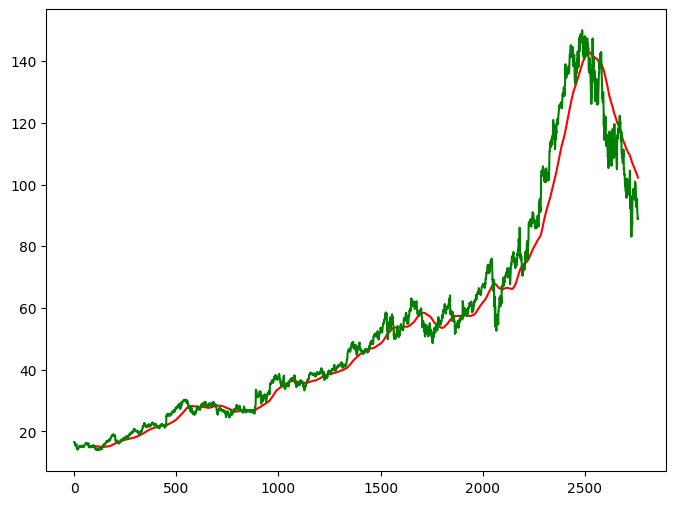

In [14]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [15]:
ma_200_days = data.Close.rolling(200).mean()

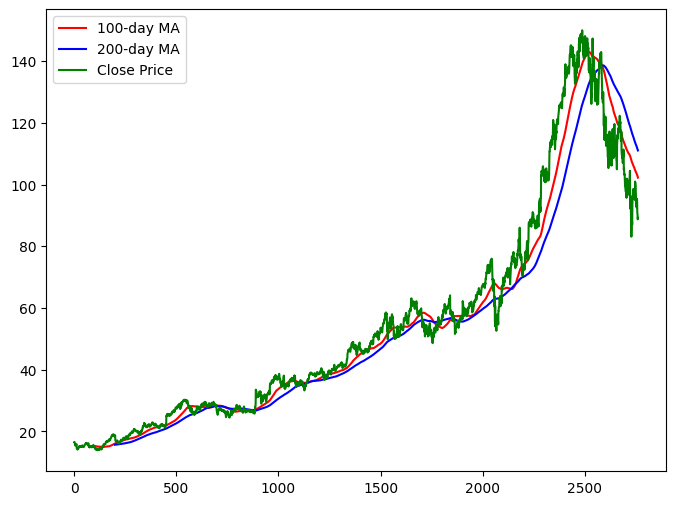

In [16]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r', label='100-day MA')
plt.plot(ma_200_days, 'b', label='200-day MA')
plt.plot(data.Close, 'g', label='Close Price')
plt.legend()
plt.show()


In [17]:
data.dropna(inplace=True)

In [18]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [19]:
data_train.shape[0]

2208

In [20]:
data_test.shape[0]

553

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_train_scale = scaler.fit_transform(data_train)

In [23]:
data_train_scale.shape

(2208, 1)

In [24]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [25]:
x, y = np.array(x), np.array(y)

In [26]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [27]:
x.shape

(2108, 100, 1)

In [28]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\Bhuvain Jhamb\Desktop\TensorFlow\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [30]:
model.fit(x,y, epochs = 5, batch_size =32, verbose =1)

Epoch 1/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - loss: 0.0627
Epoch 2/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0082
Epoch 3/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0070
Epoch 4/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - loss: 0.0058
Epoch 5/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - loss: 0.0047


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [32]:
pas_100_days = data_train.tail(100)

In [33]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [34]:
data_test_scale  =  scaler.fit_transform(data_test)

In [35]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [36]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step


In [37]:
scale =1/scaler.scale_

In [38]:
y_predict = y_predict*scale

In [39]:
y = y*scale

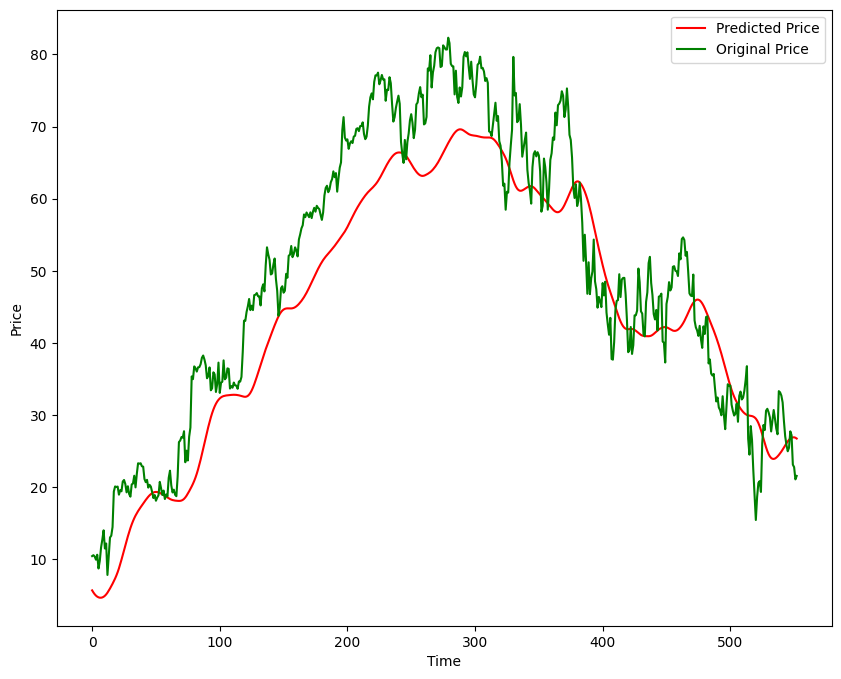

In [40]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [41]:
model.save('StockModel.keras')

In [43]:
stock ='GOOG'
start = '2012-01-01'
end = '2022-12-31'

data1 = yf.download(stock, start ,end)


[*********************100%***********************]  1 of 1 completed


In [44]:
data1

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.495003,16.562926,16.171750,16.185882,147611217
2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...
2022-12-23,89.386620,89.675253,87.206949,87.206949,17815000
2022-12-27,87.515488,89.078086,87.122353,88.888979,15470900
